## Zmienne niezależne

Załóżmy, że mamy rozkład łączny $p(x_1, x_2)$. Mówimy, że zmienne $x_1$ i $x_2$ są niezależne, jeśli: $$p(x_1, x_2) = p(x_1)p(x_2)$$

Oznacza to (wprost z definicji), że:
* $p(x_1\mid x_2) = p(x_1)$
* $p(x_2\mid x_1) = p(x_2)$

Innymi słowy, znajomość wartości jednej z tych zmiennych nie wpływa na znajomość wartości drugiej. Rozkłady warunkowe nie dodają żadnej wiedzy.

Jeśli zmienne nie są niezależne, to mówimy, że są zależne.

In [4]:
import numpy as np
import matplotlib
# interaktywne wykresy:
%matplotlib notebook
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import proj3d
from lab2 import MixtureGaussian
import seaborn as sns

<IPython.core.display.Javascript object>


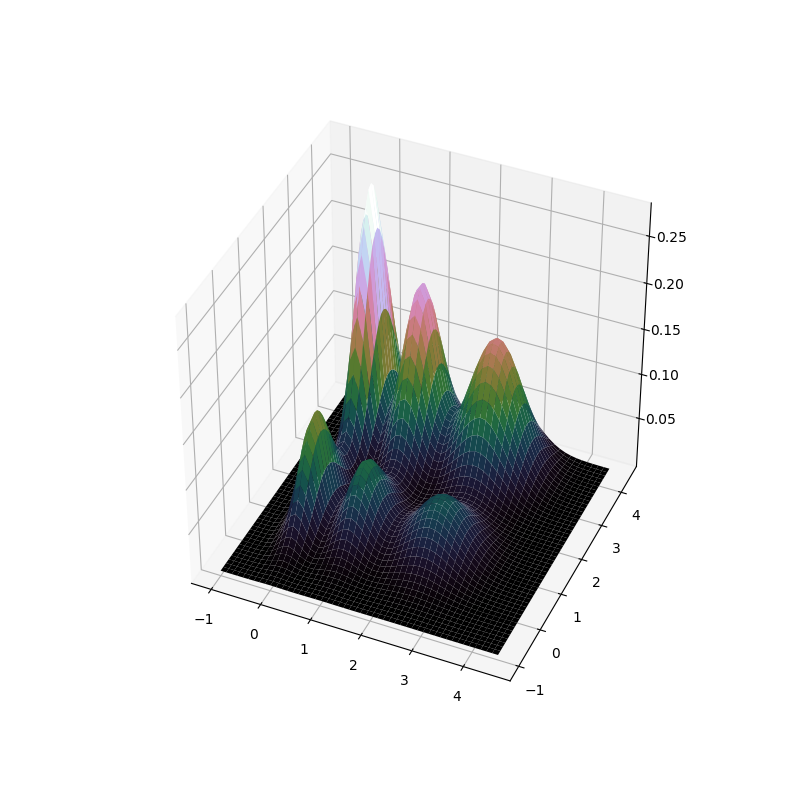

<IPython.core.display.Javascript object>


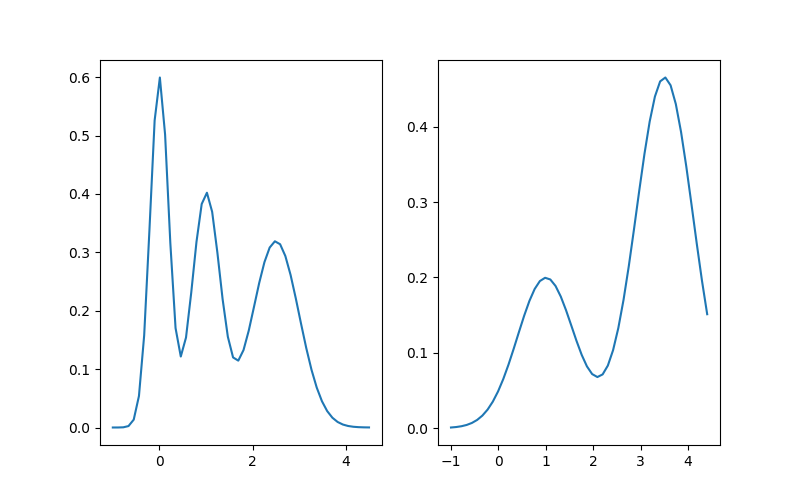

In [8]:
# Weźmy dwa rozkłady z poprzednich notebooków

# 3 górki
mg1 = MixtureGaussian(
    locs=[0., 1., 2.5],
    scales=[.2, .3, .5],
    p=[.3, .3, .4])

# 2 górki
mg2 = MixtureGaussian(
    locs=[3.5, 1.],
    scales=[.6, .6],
    p=[.7, .3])

x = np.linspace(-1, 4.5, 50)
y = np.linspace(-1, 4.4, 50)
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.meshgrid.html
xv, yv = np.meshgrid(x, y)
z = np.multiply(np.vectorize(mg1.pdf)(xv), np.vectorize(mg2.pdf)(yv))

# rysujemy rozkład łączny
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(xv, yv, z, cmap="cubehelix")

# rysujemy rozkłady brzegowe
fig = plt.figure(figsize=(8, 5))
# po pierwszej współrzędnej
ax = fig.add_subplot(1, 2, 1)
mg1_pdf = np.vectorize(mg1.pdf)(x)
ax.plot(x, mg1_pdf)
# po pierwszej współrzędnej
ax = fig.add_subplot(1, 2, 2)
mg2_pdf = np.vectorize(mg2.pdf)(y)
ax.plot(y, mg2_pdf)

### Zadanie (niepunktowane)

Każdy przekrój rozkładu łącznego równoległy do osi współrzędnych wygląda jak przeskalowany rozkład brzegowy (nawet tam, gdzie wydaje się, że wykres jest płaski i równy zero - nie jest...). Z czego to wynika (z których wzorów)? Ile wynosi stała skalowania?

Rozkład zależny nie będzie miał tej własności - dlaczego?

## Rozkład warunkowo niezależny

Musimy dołożyć trzecią zmienną. Oznaczmy ją $\theta$.

Mówimy, że zmienne $x_1$ i $x_2$ są warunkowo niezależne pod warunkiem $\theta$, jeśli: $$p(x_1, x_2 \mid\theta) = p(x_1\mid\theta)p(x_2\mid\theta)$$

Innymi słowy, jeśli znamy wartość $\theta$, to znajomość wartości $x_2$ nic nam nie mówi o wartości $x_1$.

Ale uwaga: Jeśli __nie__ znamy wartości $\theta$, to znajomość wartości $x_2$ może nam coś powiedzieć o wartości $x_1$. Możemy wnioskować bezpośrednio o $x_1$ lub pośrednio - najpierw wnioskując o $\theta$ na podstawie $x_2$, a następnie o $x_1$ na podstawie $\theta$ (w tym momencie wiedza o $x_2$ jest zbędna).

<IPython.core.display.Javascript object>


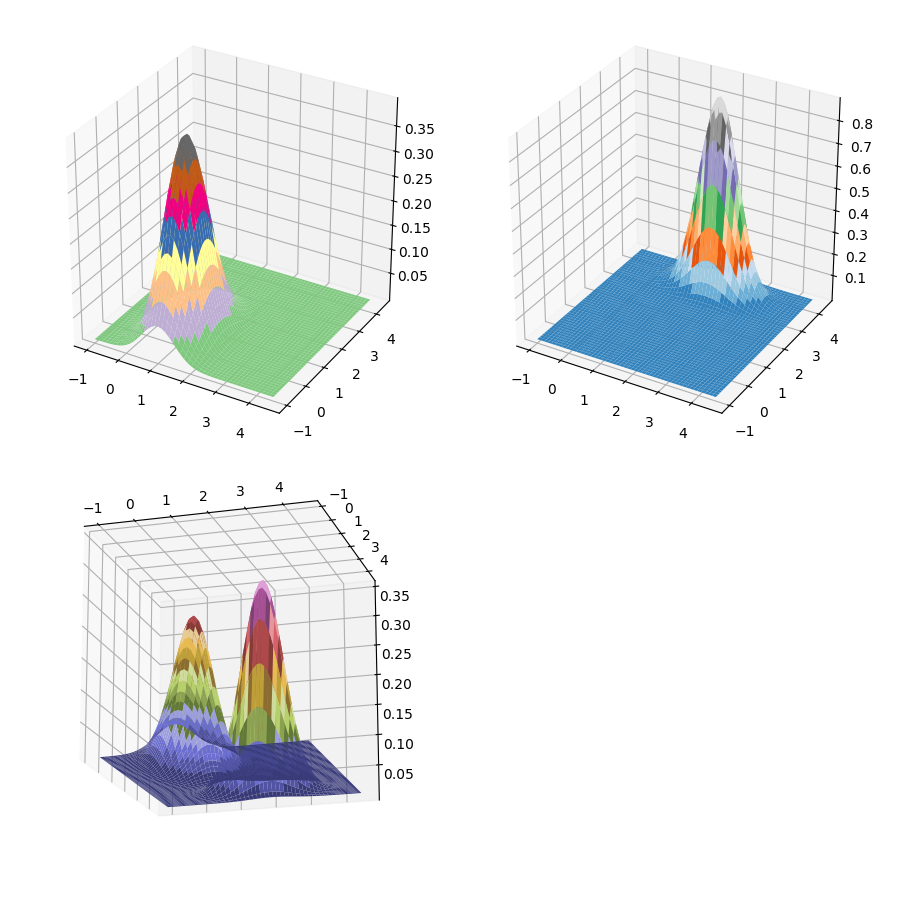

In [11]:
mg_x1_theta0 = MixtureGaussian(locs=[1.], scales=[.5], p=[1.])
mg_x2_theta0 = MixtureGaussian(locs=[.5], scales=[.8], p=[1.])

mg_x1_theta1 = MixtureGaussian(locs=[2.], scales=[.6], p=[1.])
mg_x2_theta1 = MixtureGaussian(locs=[3.5], scales=[.3], p=[1.])

x1 = np.linspace(-1, 4.5, 50)
x2 = np.linspace(-1, 4.4, 50)
x1v, x2v = np.meshgrid(x1, x2)

z_theta0 = np.multiply(
    np.vectorize(mg_x1_theta0.pdf)(x1v),
    np.vectorize(mg_x2_theta0.pdf)(x2v))

z_theta1 = np.multiply(
    np.vectorize(mg_x1_theta1.pdf)(x1v),
    np.vectorize(mg_x2_theta1.pdf)(x2v))

p_theta0 = .6
p_theta1 = .4

# rysujemy rozkład x1, x2 | theta0
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(2, 2, 1, projection='3d')
surf = ax.plot_surface(x1v, x2v, z_theta0, cmap="Accent")

# rysujemy rozkład x1, x2 | theta1
ax = fig.add_subplot(2, 2, 2, projection='3d')
surf = ax.plot_surface(x1v, x2v, z_theta1, cmap="tab20c")

# rysujemy rozkład brzegowy x1, x2
ax = fig.add_subplot(2, 2, 3, projection='3d')
surf = ax.plot_surface(x1v, x2v, p_theta0 * z_theta0 + p_theta1 * z_theta1, 
                       cmap="tab20b")

fig.tight_layout()

### Zadanie (niepunktowane)

Przy użyciu wykresów wytłumaczyć powyższe uwagi. Dlaczego "w tym momencie wiedza o $x_2$ jest zbędna"?

## Założenie i.i.d.

Jednym z podstawowych założeń w prostych problemach ML jest tzw. i.i.d. - _independent and identically distributed_.

Oznacza to, że jeśli badamy pewną zmienną $x$ (niech będą to np. zdjęcia kotów), a $x_1, x_2, \ldots, x_N$ to nasz zbiór treningowy złożony z $N$ obrazków, to istnieje pewien prawdziwy rozkład $p(x)$, a $x^1, x^2, \ldots, x^N$ to $N$ __niezależnych__ (_independent_) sampli __z tego samego rozkładu $p$__ (_identically distributed_).

Napiszmy to samo wzorami:

$p(x_1=x^1, x_2=x^2, \ldots, x_N=x^N)$ - prawdopodobieństwo __całego zbioru treningowego__

$p(x_1=x^1, x_2=x^2, \ldots, x_N=x^N) = p(x_1=x^1)p(x_2=x^2) \ldots p(x_N=x^N)$ - "_independent_"

$p(x_1=x^1)p(x_2=x^2) \ldots p(x_N=x^N)$ = $p(x=x^1)p(x=x^2) \ldots p(x=x^N)$ - "_identically distributed_"


### Zadanie z gwiazdką * (niepunktowane)

Niech $x^1, x^2, \ldots, x^N$ to nasz zbiór treningowy złożony z $N$ obrazków, a $x^{N+1}$ będzie nowym obrazkiem ze zbioru testowego, którego nie widzieliśmy podczas uczenia.

Zgodnie z założeniem i.i.d. mamy:

$p(x_{N+1}=x^{N+1}\mid x_1=x^1, x_2=x^2, \ldots, x_N=x^N) = p(x_{N+1}=x^{N+1}) = p(x = x^{N+1})$

Innymi słowy, zbiór treningowy nie daje nam żadnej nowej wiedzy na temat punktów ze zbioru testowego. Ale przecież to stoi w sprzeczności z faktem, że modele się __uczą__, to znaczy potrafią przenieść wiedzę ze zbioru treningowego na zbiór testowy. Jak to wytłumaczyć? (odpowiedź w następnym notebooku)